In [1]:
#Chapter 1: Quantum States and Qubits (https://qiskit.org/textbook/ch-states/introduction.html)

In [4]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [5]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5) #allows the reader to interact with a binary number

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

In [6]:
#exercise, n bits, 2^n states

In [7]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b) #create quantum circuit with 8 input qubits and 8 output classical bits

In [8]:
for j in range(n): #measure each, which will be zero because they're initialized to zero
    qc_output.measure(j,j)

In [11]:
qc_output.draw() #visual, automatically ascii art

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

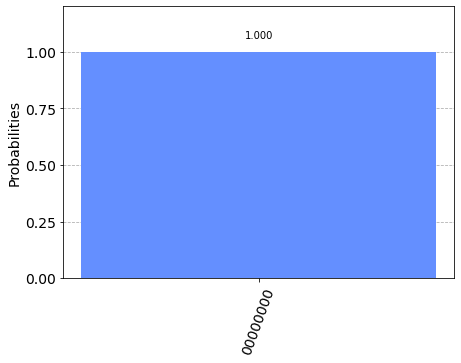

In [12]:
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts() #params: experiments, backend to execute circuit on
plot_histogram(counts)

In [15]:
#probability ^ is all 0, because each is initialized to zero
qc_encode = QuantumCircuit(n) #circuit for input with 8
qc_encode.x(7) #encoding the 8th (starts at zero)

qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

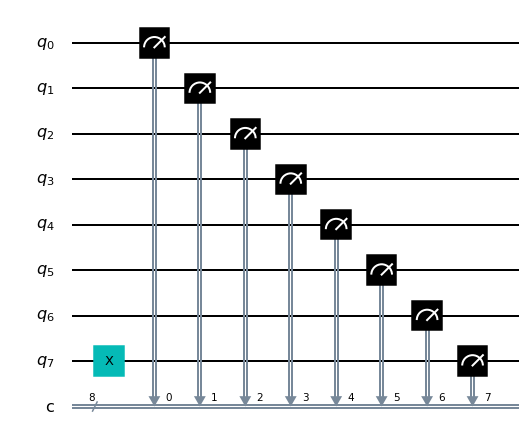

In [16]:
qc = qc_encode + qc_output #circuit made up of inputs and outputs
qc.draw(output='mpl',justify='none') #formatting parameters

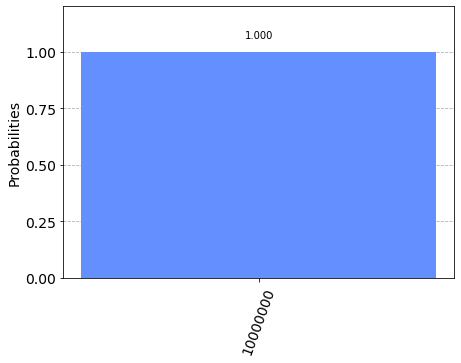

In [17]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [18]:
# ^^ 7th qubit, |0> -> |1>
qc_encode = QuantumCircuit(n) 
qc_encode.x(1) #not gate (or x gate) on other qubits
qc_encode.x(5)

qc_encode.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     └───┘
q_6: ─────
          
q_7: ─────

In [19]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1) #controlled not, control and target. If 1, the second qubit is "notted"
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [20]:
qc = QuantumCircuit(2,2) #2 input, 2 output
qc.x(0) #the first (zero-th) is a 1
qc.cx(0,1) #the output will be 10
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [21]:
qc_ha = QuantumCircuit(4,2) #function with 4 input qubits and 2 output bits
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier() #purely to visually show different parts
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

In [22]:
qc_ha = QuantumCircuit(4,2) 
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

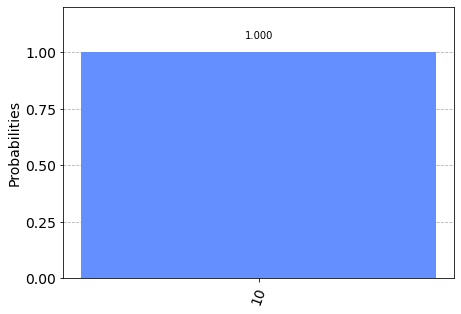

In [23]:
counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [24]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.1',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.8.0',
 'qiskit-aqua': None,
 'qiskit': '0.20.0'}

In [25]:
#1.2: Representing Qubit States

In [26]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [27]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

In [28]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw('text')  # Let's view our circuit (text drawing is required for the 'Initialize' gate due to a known bug in qiskit)

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

In [29]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

In [30]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
result = execute(qc,backend).result() # Do the simulation, returning the result

In [38]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector() #note: statevector will not exist bc you cannot measure without assigning classical bit
print(out_state) # Display the output state vector

[0.+0.j 1.+0.j]


In [39]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas: 1/═══════════════════════╩═
                               0

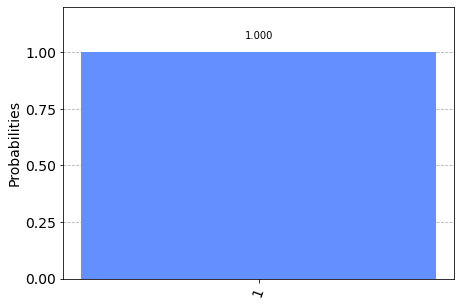

In [40]:
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

In [41]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q>

In [42]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`
state = execute(qc,backend).result().get_statevector() # Execute the circuit
print(state)           # Print the result

[0.70710678+0.j         0.        +0.70710678j]


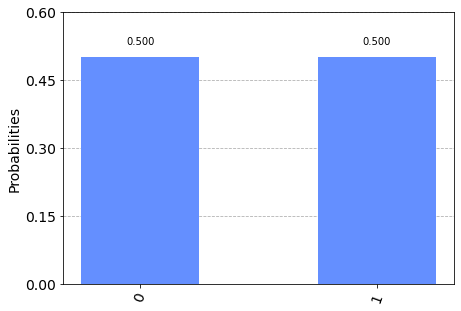

In [43]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

In [44]:
vector = [1,1]
qc.initialize(vector, 0) #error will be given because vector is not normalized

QiskitError: 'Sum of amplitudes-squared does not equal one.'

[0.57735027+0.j 0.81649658+0.j]


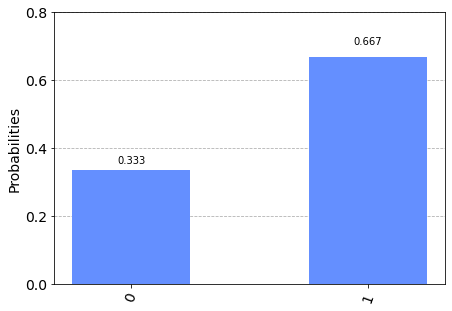

In [47]:
#Exercises
#1. Create a state vector that will give a  1/3  probability of measuring  |0⟩ .
initial_state = [1/sqrt(3), sqrt(2)/sqrt(3)]  # Define state |q>
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`
state = execute(qc,backend).result().get_statevector() # Execute the circuit
print(state)           # Print the result
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

[-0.57735027+0.j -0.81649658+0.j]


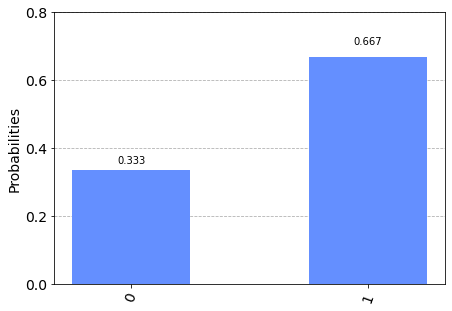

In [48]:
#2. Create a different state vector that will give the same measurement probabilities.
initial_state = [-1/sqrt(3), -sqrt(2)/sqrt(3)]  # Define state |q>
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`
state = execute(qc,backend).result().get_statevector() # Execute the circuit
print(state)           # Print the result
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

In [51]:
#3. Verify that the probability of measuring  |1⟩  for these two states is  2/3 -> seen in histogram

In [53]:
qc = QuantumCircuit(1) # Redefine qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j] 
qc.initialize(initial_state, 0)
qc.draw('text')

┌──────────────────────────────┐
q_0: ┤ initialize(0.70711j,0.70711) ├
     └──────────────────────────────┘

In [54]:
state = execute(qc, backend).result().get_statevector()
print("Qubit State = " + str(state))

Qubit State = [0.        +0.70710678j 0.70710678+0.j        ]


In [55]:
qc.measure_all()
qc.draw('text')

┌──────────────────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0.70711j,0.70711) ├─░─┤M├
        └──────────────────────────────┘ ░ └╥┘
meas: 1/════════════════════════════════════╩═
                                            0

In [56]:
state = execute(qc, backend).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = [0.+0.j 1.+0.j]


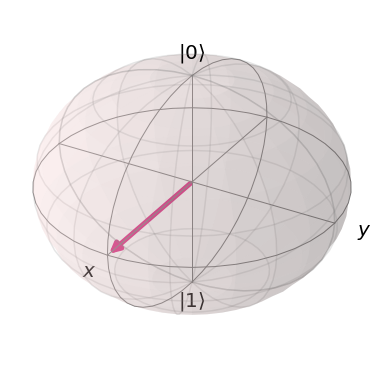

In [57]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

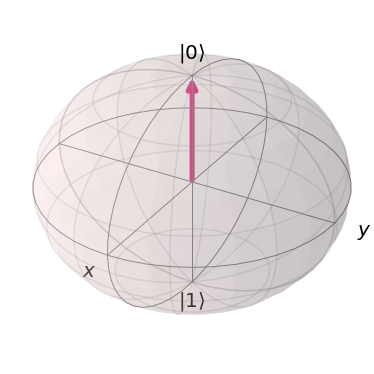

In [58]:
#exercise: Use plot_bloch_vector() or plot_bloch_sphere_spherical() to plot a qubit in the states:
#1. |0>
coords = [0,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

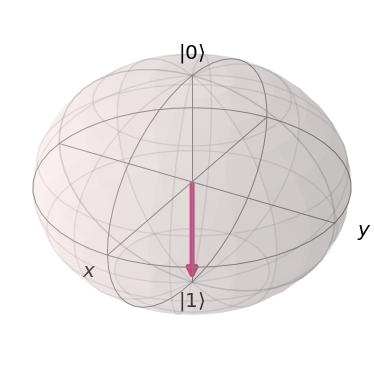

In [59]:
#2. |1>
coords = [pi,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

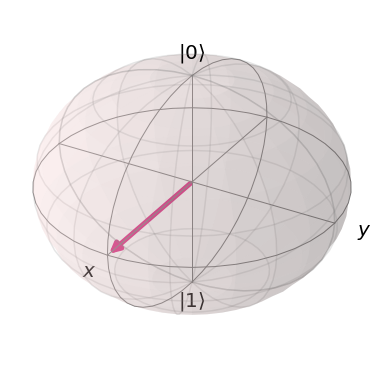

In [63]:
#3. 1/√2(|0⟩+|1⟩)
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

In [74]:
#4. 1/√2(|0⟩-i|1⟩)
#coords = [pi/2,pi/3,1] # [Theta, Phi, Radius]
#plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

In [75]:
#5. 1/√2(i|0⟩-|1⟩)
#coords = [pi/2,pi/2,1] # [Theta, Phi, Radius]
#plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

In [78]:
from qiskit_textbook.widgets import bloch_calc #widget to convert bloch coordinates to cartesian
bloch_calc()

HTML(value='<pre></pre>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01h\x00\x00\x01h\x08\x06\x00\x00\x00z\xe5a\xd5\x00\…

In [79]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.1',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.8.0',
 'qiskit-aqua': None,
 'qiskit': '0.20.0'}

In [81]:
#1.4 Single Qubit Gates
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector

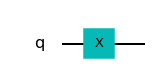

In [82]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0) #classical not equivilent
qc.draw('mpl')

In [90]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()

In [103]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli') #pauli gates merely rotate

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf8\x00\x00\x01\xf8\x08\x06\x00\x00\x00\xa6(\xff…

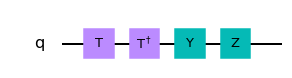

In [104]:
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw('mpl')

In [105]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf8\x00\x00\x01\xf8\x08\x06\x00\x00\x00\xa6(\xff…

In [106]:
from qiskit.extensions import Initialize # Import the Inititialize function
# Create the X-measurement function:
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit) #superposition! H!
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

# Initialise our qubit and measure it
qc = QuantumCircuit(1,1)
initial_state = [0,1]
initializer = Initialize(initial_state)
initializer.label = "init"
qc.append(initializer, [0])
x_measurement(qc, 0, 0)
qc.draw()

┌──────┐┌───┐┌─┐┌───┐
q_0: ┤ init ├┤ H ├┤M├┤ H ├
     └──────┘└───┘└╥┘└───┘
c: 1/══════════════╩══════
                   0

In [107]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
out_state = execute(qc,backend).result().get_statevector() # Do the simulation, returning the state vector

In [108]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+rz')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf8\x00\x00\x01\xf8\x08\x06\x00\x00\x00\xa6(\xff…

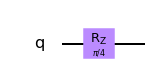

In [109]:
qc = QuantumCircuit(1)
qc.rz(pi/4, 0)
qc.draw('mpl')

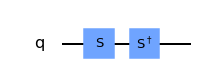

In [110]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw('mpl') #maps x on y or can join h to make more complex superpositions

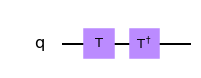

In [111]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw('mpl') #t gate does pi/4 rotation around the z axis, t dagger does -pi/4 rotation

In [112]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf8\x00\x00\x01\xf8\x08\x06\x00\x00\x00\xa6(\xff…

In [113]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.1',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.8.0',
 'qiskit-aqua': None,
 'qiskit': '0.20.0'}

In [114]:
#1.5: The case for quantum

In [115]:
rsa_250 = 2140324650240744961264423072839333563008614715144755017797754920881418023447140136643345519095804679610992851872470914587687396261921557363047454770520805119056493106687691590019759405693457452230589325976697471681738069364894699871578494975937497937

In [116]:
p = 64135289477071580278790190170577389084825014742943447208116859632024532344630238623598752668347708737661925585694639798853367
q = 33372027594978156556226010605355114227940760344767554666784520987023841729210037080257448673296881877565718986258036932062711
p*q

2140324650240744961264423072839333563008614715144755017797754920881418023447140136643345519095804679610992851872470914587687396261921557363047454770520805119056493106687691590019759405693457452230589325976697471681738069364894699871578494975937497937